# MSA 2025 Phase 2 - Part 2: Minimum Temperature Prediction from Weather Data

## 1. Load and check the dataset

### Checking what the initial dataset looks like 

In [218]:
import numpy as np
import pandas as pd

df = pd.read_csv('Summary of Weather.csv', encoding='latin1', low_memory=False)
print(df)

          STA        Date Precip  WindGustSpd    MaxTemp    MinTemp  \
0       10001    1942-7-1  1.016          NaN  25.555556  22.222222   
1       10001    1942-7-2      0          NaN  28.888889  21.666667   
2       10001    1942-7-3   2.54          NaN  26.111111  22.222222   
3       10001    1942-7-4   2.54          NaN  26.666667  22.222222   
4       10001    1942-7-5      0          NaN  26.666667  21.666667   
...       ...         ...    ...          ...        ...        ...   
119035  82506  1945-12-27      0          NaN  28.333333  18.333333   
119036  82506  1945-12-28  9.906          NaN  29.444444  18.333333   
119037  82506  1945-12-29      0          NaN  28.333333  18.333333   
119038  82506  1945-12-30      0          NaN  28.333333  18.333333   
119039  82506  1945-12-31      0          NaN  29.444444  17.222222   

         MeanTemp Snowfall PoorWeather  YR  ...  FB  FTI ITH  PGT  TSHDSBRSGF  \
0       23.888889        0         NaN  42  ... NaN  NaN NaN  NaN 

### Checking the data types for each of the columns, and if there are any null columns

In [219]:

df.head()  # first few rows
df.tail()  # last few rows
df.info()  # summary of data types and non-null counts


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119040 entries, 0 to 119039
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   STA          119040 non-null  int64  
 1   Date         119040 non-null  object 
 2   Precip       119040 non-null  object 
 3   WindGustSpd  532 non-null     float64
 4   MaxTemp      119040 non-null  float64
 5   MinTemp      119040 non-null  float64
 6   MeanTemp     119040 non-null  float64
 7   Snowfall     117877 non-null  object 
 8   PoorWeather  34237 non-null   object 
 9   YR           119040 non-null  int64  
 10  MO           119040 non-null  int64  
 11  DA           119040 non-null  int64  
 12  PRCP         117108 non-null  object 
 13  DR           533 non-null     float64
 14  SPD          532 non-null     float64
 15  MAX          118566 non-null  float64
 16  MIN          118572 non-null  float64
 17  MEA          118542 non-null  float64
 18  SNF          117877 non-

After looking at the first 10 rows, we can see all of the different column meanings:
1. Station Number (where the weather was measured)
2. Date in yyyy/mm/dd (with no leading zeroes for months/days less than 10)
3. Precipitation (as a floating point decimal, inconsistent decimal places, and value T is assumed to stand for 'trace' where the level is less than 0.001)
4. Wind Gust Speed (lots of empty columns - could be not recorded or a speed of 0?)
5. Max temperature
6. min temperature
7. mean temperature 
8. snowfall
9. poor weather
10. YR (abbreviation of date)
11. FB
12. FTI
13. ITH
14. PGT
15. TSHDWBRSGF

In [220]:
#check for nulls
df.isna().mean() * 100 # proportion of missing values

STA              0.000000
Date             0.000000
Precip           0.000000
WindGustSpd     99.553091
MaxTemp          0.000000
MinTemp          0.000000
MeanTemp         0.000000
Snowfall         0.976983
PoorWeather     71.239079
YR               0.000000
MO               0.000000
DA               0.000000
PRCP             1.622984
DR              99.552251
SPD             99.553091
MAX              0.398185
MIN              0.393145
MEA              0.418347
SNF              0.976983
SND             95.326781
FT             100.000000
FB             100.000000
FTI            100.000000
ITH            100.000000
PGT             99.558972
TSHDSBRSGF      71.239079
SD3            100.000000
RHX            100.000000
RHN            100.000000
RVG            100.000000
WTE            100.000000
dtype: float64

As seen above, There are some tables that are quite sparse in data (%null):
- wind gust (99.55%)
- poor weather (71.24%)
- DR (99.55%)
- SPD (99.55%)
- SND (95.33%)
- FT, FB, FTI, ITH, SD3, RHX, RHN, RVG, WTE all 100% empty
- PGT 99.55%
- TSHDSBRSGF 71.24%

At this stage, not sure if 'poor weather' and 'TSHDSBRSGF' are worth dropping, but I think everything else should be dropped as we are dealing with a large dataset and it will bee too time consuming to deal with for very small percentages. 

In [221]:
#check for duplicates
print(df.duplicated().sum())
df[df.duplicated()]  # view the duplicates

10


,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
94660,34139,1945-6-21,0.508,NaN,35.000000,18.888889,26.666667,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
94661,34139,1945-6-22,0,NaN,34.444444,18.888889,26.666667,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94662,34139,1945-6-23,0,NaN,36.666667,17.222222,26.666667,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94663,34139,1945-6-24,0,NaN,37.222222,16.111111,26.666667,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94664,34139,1945-6-25,0,NaN,38.333333,18.333333,28.333333,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94665,34139,1945-6-26,2.54,NaN,32.777778,19.444444,26.111111,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
94666,34139,1945-6-27,T,NaN,30.555556,20.000000,25.555556,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
94667,34139,1945-6-28,0,NaN,30.000000,20.000000,25.000000,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94668,34139,1945-6-29,1.27,NaN,30.000000,20.000000,25.000000,0,1,45,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN
94669,34139,1945-6-30,0,NaN,32.777778,16.666667,24.444444,0,NaN,45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As seen above, there are 10 rows that are completely identical, these duplicates are worth dropping

In [222]:
#check if there are inconsistent data types within each column:
# Python
single_type_columns = {}

for col in df.columns:
    types = df[col].map(type).value_counts()
    if len(types) > 1:
        print(f"\nColumn '{col}' has multiple data types:")
        print(types)
    else:
        single_type_columns[col] = types.index[0]

print("\nColumns with only one data type:")
for col, dtype in single_type_columns.items():
    print(f"{col}: {dtype}")


Column 'Snowfall' has multiple data types:
Snowfall
<class 'str'>      117877
<class 'float'>      1163
Name: count, dtype: int64

Column 'PoorWeather' has multiple data types:
PoorWeather
<class 'float'>    84803
<class 'str'>      34237
Name: count, dtype: int64

Column 'PRCP' has multiple data types:
PRCP
<class 'str'>      117108
<class 'float'>      1932
Name: count, dtype: int64

Column 'SNF' has multiple data types:
SNF
<class 'str'>      117877
<class 'float'>      1163
Name: count, dtype: int64

Column 'TSHDSBRSGF' has multiple data types:
TSHDSBRSGF
<class 'float'>    84803
<class 'str'>      34237
Name: count, dtype: int64

Columns with only one data type:
STA: <class 'int'>
Date: <class 'str'>
Precip: <class 'str'>
WindGustSpd: <class 'float'>
MaxTemp: <class 'float'>
MinTemp: <class 'float'>
MeanTemp: <class 'float'>
YR: <class 'int'>
MO: <class 'int'>
DA: <class 'int'>
DR: <class 'float'>
SPD: <class 'float'>
MAX: <class 'float'>
MIN: <class 'float'>
MEA: <class 'float'>

## 2. Clean the dataset, drop variables

In [223]:
#drop null columns 
print(df['PoorWeather'])  # proportion of missing values in Poor Weather column
df = df.dropna(axis=1, how= 'all')

#drop columns more than 50% null
for col in df.columns:
    if df[col].isna().mean() * 100 > 50:
        df = df.drop(columns=col)

#drop duplicate columns
df = df.drop_duplicates()

#date is in a string format, convert to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
#drop YR,MO,DA columns, its just giving the year again, not needed
df = df.drop(columns=['YR', 'DA', 'MO'])

#assuming that T = trace in the precipitation column, shall just replace t with 0.001 as an assumption to make statistical measures easier 
df['Precip'] = df['Precip'].replace('T', 0.001).astype(float)

#convert snowfall to float
df['Snowfall'] = pd.to_numeric(df['Snowfall'], errors='coerce')
print(df['Snowfall'])


#convert PRCP to float
df['PRCP'] = pd.to_numeric(df['PRCP'], errors='coerce')

#convert SNF to float
df['SNF'] = pd.to_numeric(df['SNF'], errors='coerce')

print(df)


0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
         ... 
119035    NaN
119036      1
119037      1
119038    NaN
119039    NaN
Name: PoorWeather, Length: 119040, dtype: object
0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
119035    0.0
119036    0.0
119037    0.0
119038    0.0
119039    0.0
Name: Snowfall, Length: 119030, dtype: float64
          STA       Date  Precip    MaxTemp    MinTemp   MeanTemp  Snowfall  \
0       10001 1942-07-01   1.016  25.555556  22.222222  23.888889       0.0   
1       10001 1942-07-02   0.000  28.888889  21.666667  25.555556       0.0   
2       10001 1942-07-03   2.540  26.111111  22.222222  24.444444       0.0   
3       10001 1942-07-04   2.540  26.666667  22.222222  24.444444       0.0   
4       10001 1942-07-05   0.000  26.666667  21.666667  24.444444       0.0   
...       ...        ...     ...        ...        ...        ...       ...   
119035  82506 1945-12-27   0.000  28.333333

MinTemp     1.000000
MIN         1.000000
MEA         0.966449
MeanTemp    0.965432
MaxTemp     0.878408
MAX         0.872123
PRCP        0.097453
Precip      0.088458
STA         0.059318
Date       -0.003625
SNF        -0.320022
Snowfall   -0.320022
Name: MinTemp, dtype: float64


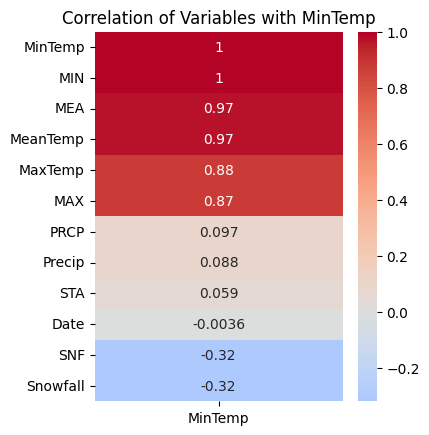

In [224]:
#finding the correlation between each column and minTemp
correlation = df.corr()['MinTemp'].sort_values(ascending=False)
print(correlation)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4, len(df.columns) * 0.4))
sns.heatmap(df.corr()[['MinTemp']].sort_values(by='MinTemp', ascending=False), 
            annot=True, cmap='coolwarm', center=0)
plt.title("Correlation of Variables with MinTemp")
plt.show()

## 3. Select the feature(s) for the model, and explain the reason

After identifying the correlation between variables that were not dropped, i think meantemp and maxtemp may be the most suitable v¥features fpr the model. They both capture unique information and have relatively high correlation scores, indicating a linear relaitonship which may allow for accurate predictions.
Mintemp: dropped due to perfect correlation (identical)
MIN: dropped as identical
MEA: seems to be a duplicate of meantemp
MAX: very similar to MaxTemp
PRCP, Precip,STA, Date: have very weak correlation, indicsting a lack of linearity 
SNF, Snowfall: smol

In [225]:
#only keep MeanTemp, MinTemp, MaxTemp columns:
model_df = df[['MeanTemp', 'MinTemp', 'MaxTemp']]

## 4. Split the dataset (80% for training, 20% for testing)

In [226]:
#separate features and labels
X, y = model_df[['MeanTemp', 'MinTemp']].values, model_df['MaxTemp'].values
#split model_df into train and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 5. Choose the algorithm, train and test the model

In [227]:
#linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

#train the model
model = LinearRegression().fit(x_train, y_train)
print(model)
import numpy as np

predictions = model.predict(x_test)
np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(predictions)[:10])
print('Actual labels   : ' ,y_test[:10])

LinearRegression()
Predicted labels:  [31. 30.  9. 21. 27. 29. 27. 26. 28. 30.]
Actual labels   :  [31.11111111 30.          8.33333333 20.55555556 27.22222222 28.88888889
 27.77777778 26.66666667 27.77777778 31.11111111]


## 6. Evaluate and Visualize model Performance

## 7. What is the R² value and RMSE of the model? How these values indicate the model performance?

In [228]:
# write your answer here

## 8. Discuss the model performance based on the plot

In [229]:
# write your answer here